In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features column


core_cols = [
    "url_len", "url_entropy",
    "url_has_login", "url_has_client", "url_has_server", "url_has_admin",
    "url_has_ip", "url_isshorted"
]

char_cols = [
    "url_count_dot", "url_count_https", "url_count_http",
    "url_count_perc", "url_count_hyphen", "url_count_www",
    "url_count_atrate", "url_count_hash", "url_count_semicolon",
    "url_count_underscore", "url_count_ques", "url_count_equal",
    "url_count_amp", "url_count_letter", "url_count_digit",
]

sensitive_cols = [
    "url_count_sensitive_financial_words",
    "url_count_sensitive_words",
]

entropy_cols = [
    "url_2bentropy", "url_3bentropy", "url_nunique_chars_ratio",
]

path_cols = [
    "path_len", "path_count_no_of_dir", "path_count_no_of_embed",
    "path_count_zero", "path_count_pertwent", "path_has_any_sensitive_words",
    "path_count_lower", "path_count_upper", "path_count_nonascii",
    "path_has_singlechardir", "path_has_upperdir",
]

query_cols = [
    "query_len", "query_count_components"
]

domain_cols = [
    "pdomain_len", "pdomain_count_hyphen", "pdomain_count_atrate",
    "pdomain_count_non_alphanum", "pdomain_count_digit",
    "tld_len", "tld_is_sus", "pdomain_min_distance",
    "subdomain_len", "subdomain_count_dot"
]

# Combine all features
cols = (
    core_cols +
    char_cols +
    sensitive_cols +
    entropy_cols +
    path_cols +
    query_cols +
    domain_cols
)




# Load dataset (50k sample for speed

df = pd.read_csv(
    "test_dataset.csv",
    usecols=cols + ["label"],   # load only needed columns
    nrows=50000                  # sample for fast baseline training
)

# Data cleaning - filling any missing values with 0
df = df.fillna(0)

#  features + labels

X = df[cols].astype(float)

# Convert label to binary: 1 = malicious, 0 = benign
y = df["label"].astype(str).str.lower().isin(["malicious", "1", "true"]).astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# -----------------------------
# Train Logistic Regression baseline
# -----------------------------
model = LogisticRegression(
    max_iter=500,
    class_weight="balanced",
    solver="liblinear",
    C=0.1
)

model.fit(X_train, y_train)

# -----------------------------
# Evaluate model
# -----------------------------
preds = model.predict(X_test)

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, preds))



=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      7819
           1       0.65      0.78      0.71      2181

    accuracy                           0.86     10000
   macro avg       0.79      0.83      0.81     10000
weighted avg       0.87      0.86      0.86     10000



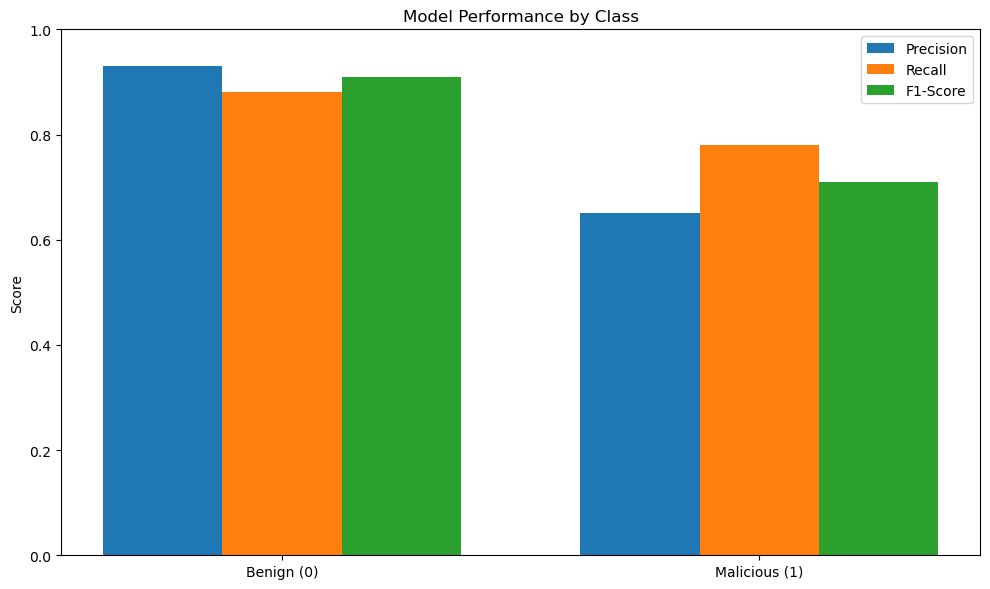

In [13]:
#FOR THE REPORT

import matplotlib.pyplot as plt
import numpy as np

classes = ["Benign (0)", "Malicious (1)"]

precision = [0.93, 0.65]
recall    = [0.88, 0.78]
f1        = [0.91, 0.71]


x = np.arange(len(classes))  # positions
width = 0.25

plt.figure(figsize=(10,6))

plt.bar(x - width, precision, width, label="Precision")
plt.bar(x,         recall,    width, label="Recall")
plt.bar(x + width, f1,        width, label="F1-Score")

plt.xticks(x, classes)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Model Performance by Class")

plt.legend()
plt.tight_layout()
plt.show()
